In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import itertools
import seaborn as sns
from numpy import corrcoef, transpose, arange
from pylab import pcolor, show, colorbar, xticks, yticks

In [ ]:
import pandas as pd
import io
df = pd.read_csv("dengue_features_train.csv")
df

,city,year,weekofyear,week_start_date,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,...,reanalysis_precip_amt_kg_per_m2,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm
0,sj,1990,18,30/04/1990,0.122600,0.103725,0.198483,0.177617,12.42,297.572857,...,32.00,73.365714,12.42,14.012857,2.628571,25.442857,6.900000,29.4,20.0,16.0
1,sj,1990,19,7/05/1990,0.169900,0.142175,0.162357,0.155486,22.82,298.211429,...,17.94,77.368571,22.82,15.372857,2.371429,26.714286,6.371429,31.7,22.2,8.6
2,sj,1990,20,14/05/1990,0.032250,0.172967,0.157200,0.170843,34.54,298.781429,...,26.10,82.052857,34.54,16.848571,2.300000,26.714286,6.485714,32.2,22.8,41.4
3,sj,1990,21,21/05/1990,0.128633,0.245067,0.227557,0.235886,15.36,298.987143,...,13.90,80.337143,15.36,16.672857,2.428571,27.471429,6.771429,33.3,23.3,4.0
4,sj,1990,22,28/05/1990,0.196200,0.262200,0.251200,0.247340,7.52,299.518571,...,12.20,80.460000,7.52,17.210000,3.014286,28.942857,9.371429,35.0,23.9,5.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1451,iq,2010,21,28/05/2010,0.342750,0.318900,0.256343,0.292514,55.30,299.334286,...,45.00,88.765714,55.30,18.485714,9.800000,28.633333,11.933333,35.4,22.4,27.0
1452,iq,2010,22,4/06/2010,0.160157,0.160371,0.136043,0.225657,86.47,298.330000,...,207.10,91.600000,86.47,18.070000,7.471429,27.433333,10.500000,34.7,21.7,36.6
1453,iq,2010,23,11/06/2010,0.247057,0.146057,0.250357,0.233714,58.94,296.598571,...,50.60,94.280000,58.94,17.008571,7.500000,24.400000,6.900000,32.2,19.2,7.4
1454,iq,2010,24,18/06/2010,0.333914,0.245771,0.278886,0.325486,59.67,296.345714,...,62.33,94.660000,59.67,16.815714,7.871429,25.433333,8.733333,31.2,21.0,16.0


In [ ]:
df.drop(['week_start_date'], axis= 1, inplace = True)
df.drop(["city"], axis = 1, inplace = True)
df.drop(["year"], axis = 1, inplace = True)
df.drop(["weekofyear"], axis = 1, inplace = True)
df.head()
df.isnull().sum()
pd.isnull(df).any()
df.fillna(method='ffill', inplace=True)
pd.isnull(df).any()

ndvi_ne                                  False
ndvi_nw                                  False
ndvi_se                                  False
ndvi_sw                                  False
precipitation_amt_mm                     False
reanalysis_air_temp_k                    False
reanalysis_avg_temp_k                    False
reanalysis_dew_point_temp_k              False
reanalysis_max_air_temp_k                False
reanalysis_min_air_temp_k                False
reanalysis_precip_amt_kg_per_m2          False
reanalysis_relative_humidity_percent     False
reanalysis_sat_precip_amt_mm             False
reanalysis_specific_humidity_g_per_kg    False
reanalysis_tdtr_k                        False
station_avg_temp_c                       False
station_diur_temp_rng_c                  False
station_max_temp_c                       False
station_min_temp_c                       False
station_precip_mm                        False
dtype: bool

In [ ]:
df_feat = transpose(df)
df_feat

,0,1,2,3,4,5,6,7,8,9,...,1446,1447,1448,1449,1450,1451,1452,1453,1454,1455
ndvi_ne,0.122600,0.169900,0.032250,0.128633,0.196200,0.196200,0.112900,0.072500,0.102450,0.102450,...,0.231486,0.239743,0.260814,0.168686,0.263071,0.342750,0.160157,0.247057,0.333914,0.298186
ndvi_nw,0.103725,0.142175,0.172967,0.245067,0.262200,0.174850,0.092800,0.072500,0.146175,0.121550,...,0.294686,0.259271,0.255786,0.158500,0.272500,0.318900,0.160371,0.146057,0.245771,0.232971
ndvi_se,0.198483,0.162357,0.157200,0.227557,0.251200,0.254314,0.205071,0.151471,0.125571,0.160683,...,0.331657,0.307786,0.257771,0.133071,0.258271,0.256343,0.136043,0.250357,0.278886,0.274214
ndvi_sw,0.177617,0.155486,0.170843,0.235886,0.247340,0.181743,0.210271,0.133029,0.123600,0.202567,...,0.244400,0.307943,0.340286,0.145600,0.244500,0.292514,0.225657,0.233714,0.325486,0.315757
precipitation_amt_mm,12.420000,22.820000,34.540000,15.360000,7.520000,9.580000,3.480000,151.120000,19.320000,14.410000,...,86.700000,26.000000,73.970000,59.400000,1.150000,55.300000,86.470000,58.940000,59.670000,63.220000
reanalysis_air_temp_k,297.572857,298.211429,298.781429,298.987143,299.518571,299.630000,299.207143,299.591429,299.578571,300.154286,...,298.438571,299.048571,297.617143,297.278571,297.648571,299.334286,298.330000,296.598571,296.345714,298.097143
reanalysis_avg_temp_k,297.742857,298.442857,298.878571,299.228571,299.664286,299.764286,299.221429,299.528571,299.557143,300.278571,...,299.507143,300.028571,298.585714,297.935714,298.707143,300.771429,299.392857,297.592857,297.521429,299.835714
reanalysis_dew_point_temp_k,292.414286,293.951429,295.434286,295.310000,295.821429,295.851429,295.865714,296.531429,296.378571,296.651429,...,297.678571,296.468571,296.975714,296.738571,293.227143,296.825714,296.452857,295.501429,295.324286,295.807143
reanalysis_max_air_temp_k,299.800000,300.900000,300.500000,301.400000,301.900000,302.400000,301.300000,300.600000,302.100000,302.300000,...,304.700000,308.400000,304.700000,306.000000,308.700000,309.700000,308.500000,305.500000,306.100000,307.800000
reanalysis_min_air_temp_k,295.900000,296.400000,297.300000,297.000000,297.500000,298.100000,297.700000,298.400000,297.700000,298.700000,...,294.700000,294.600000,294.600000,294.000000,290.100000,294.500000,291.900000,292.400000,291.900000,292.300000


In [ ]:
names =  df_feat.index
names

Index(['ndvi_ne', 'ndvi_nw', 'ndvi_se', 'ndvi_sw', 'precipitation_amt_mm',
       'reanalysis_air_temp_k', 'reanalysis_avg_temp_k',
       'reanalysis_dew_point_temp_k', 'reanalysis_max_air_temp_k',
       'reanalysis_min_air_temp_k', 'reanalysis_precip_amt_kg_per_m2',
       'reanalysis_relative_humidity_percent', 'reanalysis_sat_precip_amt_mm',
       'reanalysis_specific_humidity_g_per_kg', 'reanalysis_tdtr_k',
       'station_avg_temp_c', 'station_diur_temp_rng_c', 'station_max_temp_c',
       'station_min_temp_c', 'station_precip_mm'],
      dtype='object')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  import sys


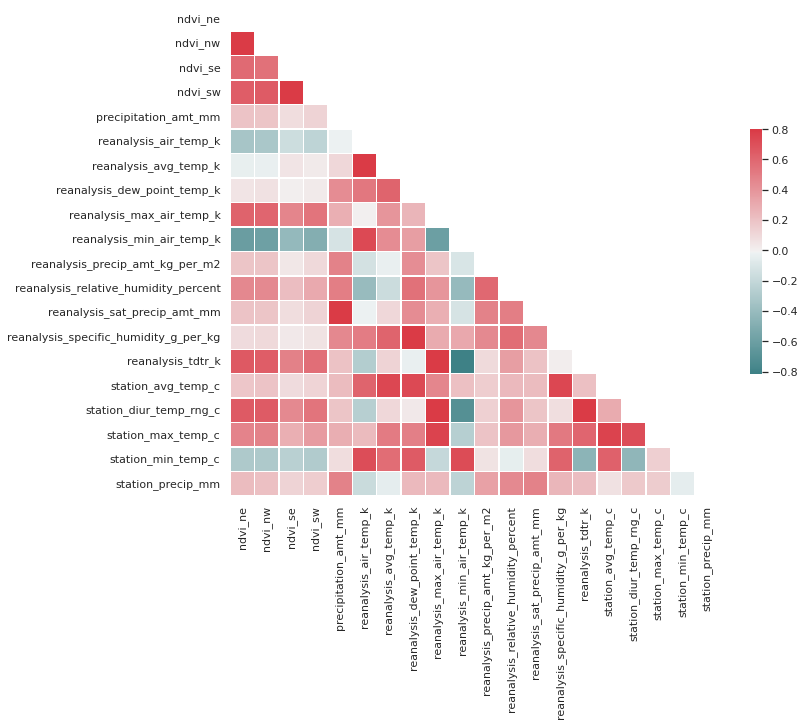

In [ ]:
#https://docs.scipy.org/doc/numpy/reference/generated/numpy.corrcoef.html
R = corrcoef(df_feat)

# http://stanford.edu/~mwaskom/software/seaborn/examples/many_pairwise_correlations.html
# Generate a mask for the upper triangle
sns.set(style="white")
mask = np.zeros_like(R, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(200, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(R, mask=mask, cmap=cmap, vmax=.8,
            square=True, xticklabels=names, yticklabels=names,
            linewidths=.5, cbar_kws={"shrink": .5}, ax=ax)

Variance Ratio:  [0.97883602 0.01292526]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:25: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations. 


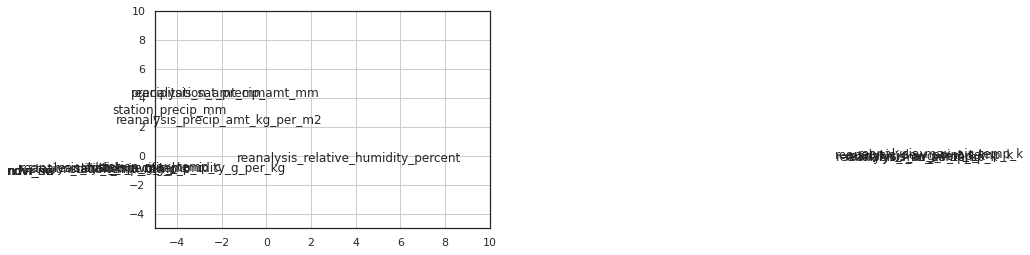

In [ ]:
#1. Normalization of the data
#http://scikit-learn.org/stable/modules/preprocessing.html
from sklearn import preprocessing 
min_max_scaler = preprocessing.MinMaxScaler()
features_norm = min_max_scaler.fit_transform(df_feat)



#1.2. Principal Component Analysis
from sklearn.decomposition import PCA
estimator = PCA (n_components = 2)
X_pca = estimator.fit_transform(features_norm)
print("Variance Ratio: ", estimator.explained_variance_ratio_) 


import matplotlib.pyplot as plt
fig, ax = plt.subplots()
for i in range(len(X_pca)):
    plt.text(X_pca[i][0], X_pca[i][1], names[i]) 


plt.xlim(-5, 10)
plt.ylim(-5, 10)
ax.grid(True)
fig.tight_layout()
plt.show()

/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_distance_metric.py:14: FutureWarning: sklearn.neighbors.DistanceMetric has been moved to sklearn.metrics.DistanceMetric in 1.0. This import path will be removed in 1.3
  category=FutureWarning,


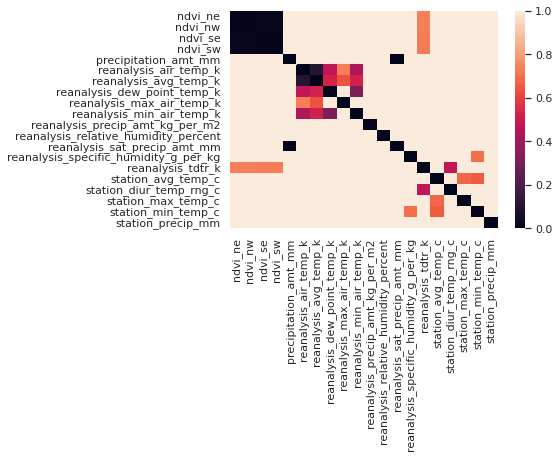

In [ ]:
# 2. Compute the similarity matrix
#http://docs.scipy.org/doc/scipy/reference/cluster.html
from scipy import cluster
import sklearn.neighbors
dist = sklearn.neighbors.DistanceMetric.get_metric('euclidean')
matdist= dist.pairwise(features_norm)


# 3.1.1 Visualization
import seaborn as sns; sns.set()
ax = sns.heatmap(matdist,vmin=0, vmax=1, yticklabels = names, xticklabels = names)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  This is separate from the ipykernel package so we can avoid doing imports until


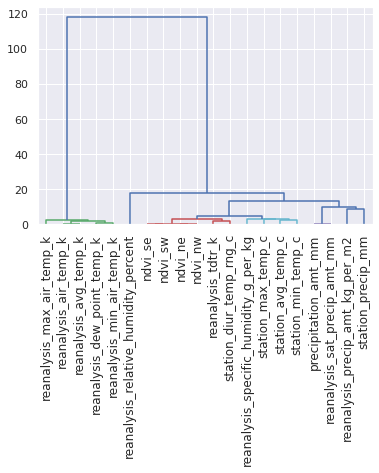

In [ ]:
# 3. Building the Dendrogram	
# http://docs.scipy.org/doc/scipy/reference/generated/scipy.cluster.hierarchy.linkage.html#scipy.cluster.hierarchy.linkage
clusters = cluster.hierarchy.linkage(matdist, method = 'single')
# http://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.cluster.hierarchy.dendrogram.html
cluster.hierarchy.dendrogram(clusters, color_threshold = 3, labels = names , leaf_rotation=90)
plt.show()

In [ ]:
cut = 20 # !!!! ad-hoc
labels = cluster.hierarchy.fcluster(clusters, cut , criterion = 'distance')

labels

array([2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2],
      dtype=int32)

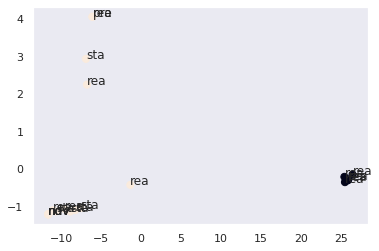

In [ ]:
#plotting orginal points with color related to label
plt.scatter(X_pca[:,0], X_pca[:,1], c=labels,s=50)
for i in range(len(X_pca)):
    plt.text(X_pca[i][0], X_pca[i][1], names[i][0:3]) 

plt.grid()
plt.show()

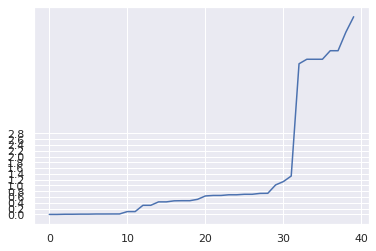

In [ ]:
minPts=2
from sklearn.neighbors import kneighbors_graph
A = kneighbors_graph(features_norm, minPts, include_self=False)
Ar = A.toarray()

seq = []
for i,s in enumerate(features_norm):
    for j in range(len(features_norm)):
        if Ar[i][j] != 0:
            seq.append(matdist[i][j])
            
seq.sort()
# establecer intervalo ejes
fig = plt.figure()
ax = fig.gca()
ax.set_xticks(np.arange(0, 120, 10))
ax.set_yticks(np.arange(0, 3, 0.2))

plt.plot(seq)


plt.show()

In [ ]:
from sklearn.cluster import DBSCAN

for eps in np.arange(0.50, 1.2, 0.20):
  db = DBSCAN(eps, min_samples=minPts).fit(features_norm)
  core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
  core_samples_mask[db.core_sample_indices_] = True
  labels = db.labels_
  n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
  n_outliers = list(labels).count(-1)
  print ("%6.2f, %d, %d" % (eps, n_clusters_, n_outliers))
  
#labels

  0.50, 4, 8
  0.70, 5, 3
  0.90, 4, 3
  1.10, 4, 3


In [ ]:
db = DBSCAN(eps=0.9, min_samples=minPts).fit(features_norm)
labels = db.labels_
labels

array([ 0,  0,  0,  0,  1,  2,  2,  2,  2,  2, -1, -1,  1,  3,  0,  3,  0,
        3,  3, -1])

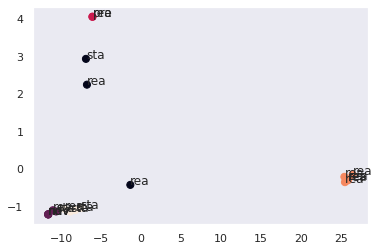

In [ ]:
#plotting orginal points with color related to label
plt.scatter(X_pca[:,0], X_pca[:,1], c=labels,s=50)
for i in range(len(X_pca)):
    plt.text(X_pca[i][0], X_pca[i][1], names[i][0:3]) 
plt.grid()
plt.show()

In [ ]:
df_feat['dbscan_group'] = labels

df_feat[df_feat['dbscan_group'] == -1]

,0,1,2,3,4,5,6,7,8,9,...,1447,1448,1449,1450,1451,1452,1453,1454,1455,dbscan_group
reanalysis_precip_amt_kg_per_m2,32.000000,17.940000,26.100000,13.900000,12.20,26.490000,38.6,30.000000,37.510000,28.400000,...,23.600000,85.460000,87.300000,8.800000,45.000000,207.1,50.60,62.33,36.900000,-1
reanalysis_relative_humidity_percent,73.365714,77.368571,82.052857,80.337143,80.46,79.891429,82.0,83.375714,82.768571,81.281429,...,87.657143,96.712857,97.445714,78.998571,88.765714,91.6,94.28,94.66,89.082857,-1
station_precip_mm,16.000000,8.600000,41.400000,4.000000,5.80,39.100000,29.7,21.100000,21.100000,1.100000,...,35.400000,8.100000,32.000000,2.500000,27.000000,36.6,7.40,16.00,20.400000,-1


Estas tres caracteristicas han sido agregadas en el selected features code para analizar esa parte del data set.